In [88]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

from mapie.metrics import (coverage_width_based, regression_coverage_score,
                           regression_mean_width_score)
from mapie.regression import MapieTimeSeriesRegressor
from mapie.subsample import BlockBootstrap

warnings.simplefilter("ignore")

In [1]:
import pandas as pd
df = pd.read_csv('targetencoding.csv')
df

,jurisdiction,collection_date,number_hospitals_reporting_today,total_hospitals,admissions_all_covid_confirmed,admissions_70_covid_confirmed,admissions_30_49_covid_confirmed,admissions_50_69_covid_confirmed,admissions_50_59_covid_confirmed,admissions_30_39_covid_confirmed,...,day_of_year_cos,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,jurisdiction_target_encoded
0,AZ,01-08-2020,55.0,95.0,95.0,26.0,16.0,35.0,16.0,6.0,...,-0.856551,-0.866025,-0.5,0.201299,0.979530,-0.974928,-0.222521,2,1,126.528660
1,AZ,02-08-2020,76.0,95.0,124.0,29.0,24.0,34.0,12.0,8.0,...,-0.847541,-0.866025,-0.5,0.394356,0.918958,-0.781831,0.623490,2,1,126.528660
2,AZ,03-08-2020,82.0,95.0,100.0,26.0,21.0,28.0,14.0,13.0,...,-0.838280,-0.866025,-0.5,0.571268,0.820763,0.000000,1.000000,2,0,126.528660
3,AZ,04-08-2020,81.0,95.0,121.0,32.0,23.0,32.0,12.0,12.0,...,-0.828770,-0.866025,-0.5,0.724793,0.688967,0.781831,0.623490,2,0,126.528660
4,AZ,05-08-2020,84.0,95.0,120.0,27.0,28.0,35.0,14.0,14.0,...,-0.819015,-0.866025,-0.5,0.848644,0.528964,0.974928,-0.222521,2,0,126.528660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83606,UT,13-02-2024,50.0,53.0,18.0,8.0,5.0,2.0,0.0,4.0,...,0.726608,0.866025,0.5,0.485302,-0.874347,0.781831,0.623490,4,0,39.176808
83607,UT,14-02-2024,49.0,53.0,22.0,10.0,1.0,6.0,3.0,0.0,...,0.714673,0.866025,0.5,0.299363,-0.954139,0.974928,-0.222521,4,0,39.176808
83608,UT,15-02-2024,49.0,53.0,17.0,8.0,3.0,2.0,1.0,1.0,...,0.702527,0.866025,0.5,0.101168,-0.994869,0.433884,-0.900969,4,0,39.176808
83609,UT,16-02-2024,49.0,53.0,9.0,3.0,2.0,2.0,1.0,1.0,...,0.690173,0.866025,0.5,-0.101168,-0.994869,-0.433884,-0.900969,4,0,39.176808


In [4]:
df['proportion_inpatient_beds_covid_vs_normal'] = df['percent_inpatient_beds_covid'] / df['percent_inpatient_beds_occupied']
df

,jurisdiction,collection_date,number_hospitals_reporting_today,total_hospitals,admissions_all_covid_confirmed,admissions_70_covid_confirmed,admissions_30_49_covid_confirmed,admissions_50_69_covid_confirmed,admissions_50_59_covid_confirmed,admissions_30_39_covid_confirmed,...,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,jurisdiction_target_encoded,proportion_inpatient_beds_covid_vs_normal
0,AZ,01-08-2020,55.0,95.0,95.0,26.0,16.0,35.0,16.0,6.0,...,-0.866025,-0.5,0.201299,0.979530,-0.974928,-0.222521,2,1,126.528660,0.196035
1,AZ,02-08-2020,76.0,95.0,124.0,29.0,24.0,34.0,12.0,8.0,...,-0.866025,-0.5,0.394356,0.918958,-0.781831,0.623490,2,1,126.528660,0.199408
2,AZ,03-08-2020,82.0,95.0,100.0,26.0,21.0,28.0,14.0,13.0,...,-0.866025,-0.5,0.571268,0.820763,0.000000,1.000000,2,0,126.528660,0.190894
3,AZ,04-08-2020,81.0,95.0,121.0,32.0,23.0,32.0,12.0,12.0,...,-0.866025,-0.5,0.724793,0.688967,0.781831,0.623490,2,0,126.528660,0.175216
4,AZ,05-08-2020,84.0,95.0,120.0,27.0,28.0,35.0,14.0,14.0,...,-0.866025,-0.5,0.848644,0.528964,0.974928,-0.222521,2,0,126.528660,0.170902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83606,UT,13-02-2024,50.0,53.0,18.0,8.0,5.0,2.0,0.0,4.0,...,0.866025,0.5,0.485302,-0.874347,0.781831,0.623490,4,0,39.176808,0.022576
83607,UT,14-02-2024,49.0,53.0,22.0,10.0,1.0,6.0,3.0,0.0,...,0.866025,0.5,0.299363,-0.954139,0.974928,-0.222521,4,0,39.176808,0.022246
83608,UT,15-02-2024,49.0,53.0,17.0,8.0,3.0,2.0,1.0,1.0,...,0.866025,0.5,0.101168,-0.994869,0.433884,-0.900969,4,0,39.176808,0.023050
83609,UT,16-02-2024,49.0,53.0,9.0,3.0,2.0,2.0,1.0,1.0,...,0.866025,0.5,-0.101168,-0.994869,-0.433884,-0.900969,4,0,39.176808,0.021021


In [7]:
df.to_csv('Proportion2.csv',index=False)

In [388]:
df = pd.read_csv('Proportion2.csv')
df

,jurisdiction,collection_date,number_hospitals_reporting_today,total_hospitals,admissions_all_covid_confirmed,admissions_70_covid_confirmed,admissions_30_49_covid_confirmed,admissions_50_69_covid_confirmed,admissions_50_59_covid_confirmed,admissions_30_39_covid_confirmed,...,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,jurisdiction_target_encoded,proportion_inpatient_beds_covid_vs_normal
0,AZ,01-08-2020,55.0,95.0,95.0,26.0,16.0,35.0,16.0,6.0,...,-0.866025,-0.5,0.201299,0.979530,-0.974928,-0.222521,2,1,126.528660,0.196035
1,AZ,02-08-2020,76.0,95.0,124.0,29.0,24.0,34.0,12.0,8.0,...,-0.866025,-0.5,0.394356,0.918958,-0.781831,0.623490,2,1,126.528660,0.199408
2,AZ,03-08-2020,82.0,95.0,100.0,26.0,21.0,28.0,14.0,13.0,...,-0.866025,-0.5,0.571268,0.820763,0.000000,1.000000,2,0,126.528660,0.190894
3,AZ,04-08-2020,81.0,95.0,121.0,32.0,23.0,32.0,12.0,12.0,...,-0.866025,-0.5,0.724793,0.688967,0.781831,0.623490,2,0,126.528660,0.175216
4,AZ,05-08-2020,84.0,95.0,120.0,27.0,28.0,35.0,14.0,14.0,...,-0.866025,-0.5,0.848644,0.528964,0.974928,-0.222521,2,0,126.528660,0.170902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83606,UT,13-02-2024,50.0,53.0,18.0,8.0,5.0,2.0,0.0,4.0,...,0.866025,0.5,0.485302,-0.874347,0.781831,0.623490,4,0,39.176808,0.022576
83607,UT,14-02-2024,49.0,53.0,22.0,10.0,1.0,6.0,3.0,0.0,...,0.866025,0.5,0.299363,-0.954139,0.974928,-0.222521,4,0,39.176808,0.022246
83608,UT,15-02-2024,49.0,53.0,17.0,8.0,3.0,2.0,1.0,1.0,...,0.866025,0.5,0.101168,-0.994869,0.433884,-0.900969,4,0,39.176808,0.023050
83609,UT,16-02-2024,49.0,53.0,9.0,3.0,2.0,2.0,1.0,1.0,...,0.866025,0.5,-0.101168,-0.994869,-0.433884,-0.900969,4,0,39.176808,0.021021


In [389]:
filtered_df = df[df['jurisdiction'] == 'VI']
filtered_df

,jurisdiction,collection_date,number_hospitals_reporting_today,total_hospitals,admissions_all_covid_confirmed,admissions_70_covid_confirmed,admissions_30_49_covid_confirmed,admissions_50_69_covid_confirmed,admissions_50_59_covid_confirmed,admissions_30_39_covid_confirmed,...,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,jurisdiction_target_encoded,proportion_inpatient_beds_covid_vs_normal
36288,VI,01-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.201299,0.979530,-0.974928,-0.222521,2,1,0.484788,0.086420
36289,VI,02-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.394356,0.918958,-0.781831,0.623490,2,1,0.484788,0.080460
36290,VI,03-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.571268,0.820763,0.000000,1.000000,2,0,0.484788,0.085106
36291,VI,04-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.724793,0.688967,0.781831,0.623490,2,0,0.484788,0.070707
36292,VI,05-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.848644,0.528964,0.974928,-0.222521,2,0,0.484788,0.051546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37579,VI,13-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.485302,-0.874347,0.781831,0.623490,4,0,0.484788,0.009091
37580,VI,14-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.299363,-0.954139,0.974928,-0.222521,4,0,0.484788,0.009174
37581,VI,15-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.101168,-0.994869,0.433884,-0.900969,4,0,0.484788,0.010101
37582,VI,16-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,-0.101168,-0.994869,-0.433884,-0.900969,4,0,0.484788,0.009709


In [392]:
df = filtered_df

In [26]:
min_value = df['proportion_inpatient_beds_covid_vs_normal'].min()
max_value = df['proportion_inpatient_beds_covid_vs_normal'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")


Minimum value: 0.0
Maximum value: 0.3508771929746999


In [226]:
# Assuming 'df' is your DataFrame and 'percent_inpatient_beds_occupied' is a column in it

min_value = df['percent_staff_icu_beds_occupied'].min()
max_value = df['percent_staff_icu_beds_occupied'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")


Minimum value: 0.0
Maximum value: 94.11764706


In [148]:
# Assuming 'df' is your DataFrame and 'percent_inpatient_beds_occupied' is a column in it

min_value = df['percent_inpatient_beds_occupied'].min()
max_value = df['percent_inpatient_beds_occupied'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")


Minimum value: 39.36170213
Maximum value: 83.92857143


In [300]:
# Assuming 'df' is your DataFrame and 'percent_inpatient_beds_occupied' is a column in it

min_value = df['total_patients_hospitalized_covid_confirmed'].min()
max_value = df['total_patients_hospitalized_covid_confirmed'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")


Minimum value: 0.0
Maximum value: 40.0


In [394]:
# Assuming 'df' is your DataFrame and 'percent_inpatient_beds_occupied' is a column in it

min_value = df['total_patients_hospitalized_influenza_confirmed'].min()
max_value = df['total_patients_hospitalized_influenza_confirmed'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")


Minimum value: 0.0
Maximum value: 1.0


In [396]:
df.rename({'collection_date': 'timestamp','total_patients_hospitalized_influenza_confirmed': 'y'}, axis='columns', inplace=True)
df

,jurisdiction,timestamp,number_hospitals_reporting_today,total_hospitals,admissions_all_covid_confirmed,admissions_70_covid_confirmed,admissions_30_49_covid_confirmed,admissions_50_69_covid_confirmed,admissions_50_59_covid_confirmed,admissions_30_39_covid_confirmed,...,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,jurisdiction_target_encoded,proportion_inpatient_beds_covid_vs_normal
36288,VI,01-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.201299,0.979530,-0.974928,-0.222521,2,1,0.484788,0.086420
36289,VI,02-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.394356,0.918958,-0.781831,0.623490,2,1,0.484788,0.080460
36290,VI,03-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.571268,0.820763,0.000000,1.000000,2,0,0.484788,0.085106
36291,VI,04-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.724793,0.688967,0.781831,0.623490,2,0,0.484788,0.070707
36292,VI,05-08-2020,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.848644,0.528964,0.974928,-0.222521,2,0,0.484788,0.051546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37579,VI,13-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.485302,-0.874347,0.781831,0.623490,4,0,0.484788,0.009091
37580,VI,14-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.299363,-0.954139,0.974928,-0.222521,4,0,0.484788,0.009174
37581,VI,15-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.101168,-0.994869,0.433884,-0.900969,4,0,0.484788,0.010101
37582,VI,16-02-2024,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,-0.101168,-0.994869,-0.433884,-0.900969,4,0,0.484788,0.009709


In [398]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y')
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df

,jurisdiction,timestamp,number_hospitals_reporting_today,total_hospitals,admissions_all_covid_confirmed,admissions_70_covid_confirmed,admissions_30_49_covid_confirmed,admissions_50_69_covid_confirmed,admissions_50_59_covid_confirmed,admissions_30_39_covid_confirmed,...,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,jurisdiction_target_encoded,proportion_inpatient_beds_covid_vs_normal
36288,VI,2020-08-01,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.201299,0.979530,-0.974928,-0.222521,2,1,0.484788,0.086420
36289,VI,2020-08-02,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.394356,0.918958,-0.781831,0.623490,2,1,0.484788,0.080460
36290,VI,2020-08-03,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.571268,0.820763,0.000000,1.000000,2,0,0.484788,0.085106
36291,VI,2020-08-04,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.724793,0.688967,0.781831,0.623490,2,0,0.484788,0.070707
36292,VI,2020-08-05,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.866025,-0.5,0.848644,0.528964,0.974928,-0.222521,2,0,0.484788,0.051546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37579,VI,2024-02-13,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.485302,-0.874347,0.781831,0.623490,4,0,0.484788,0.009091
37580,VI,2024-02-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.299363,-0.954139,0.974928,-0.222521,4,0,0.484788,0.009174
37581,VI,2024-02-15,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,0.101168,-0.994869,0.433884,-0.900969,4,0,0.484788,0.010101
37582,VI,2024-02-16,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866025,0.5,-0.101168,-0.994869,-0.433884,-0.900969,4,0,0.484788,0.009709


In [400]:

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract temporal features
#df['weekofyear'] = df['timestamp'].dt.isocalendar().week.astype("int64")
#df['weekday'] = df['timestamp'].dt.isocalendar().day.astype("int64")
#df['dayofmonth'] = df['timestamp'].dt.day

print(df)

      jurisdiction  timestamp  number_hospitals_reporting_today  \
36288           VI 2020-08-01                               2.0   
36289           VI 2020-08-02                               2.0   
36290           VI 2020-08-03                               2.0   
36291           VI 2020-08-04                               2.0   
36292           VI 2020-08-05                               2.0   
...            ...        ...                               ...   
37579           VI 2024-02-13                               2.0   
37580           VI 2024-02-14                               2.0   
37581           VI 2024-02-15                               2.0   
37582           VI 2024-02-16                               2.0   
37583           VI 2024-02-17                               2.0   

       total_hospitals  admissions_all_covid_confirmed  \
36288              2.0                             0.0   
36289              2.0                             0.0   
36290              2.

In [402]:
# Create lag features based on days
n_lags = 5
for day in range(1, n_lags):
    df[f'Lag_{day}'] = df['y'].shift(day)
print(df)

      jurisdiction  timestamp  number_hospitals_reporting_today  \
36288           VI 2020-08-01                               2.0   
36289           VI 2020-08-02                               2.0   
36290           VI 2020-08-03                               2.0   
36291           VI 2020-08-04                               2.0   
36292           VI 2020-08-05                               2.0   
...            ...        ...                               ...   
37579           VI 2024-02-13                               2.0   
37580           VI 2024-02-14                               2.0   
37581           VI 2024-02-15                               2.0   
37582           VI 2024-02-16                               2.0   
37583           VI 2024-02-17                               2.0   

       total_hospitals  admissions_all_covid_confirmed  \
36288              2.0                             0.0   
36289              2.0                             0.0   
36290              2.

In [158]:
#percent_inpatient_beds_occupied
exog_cols = ['timestamp','number_hospitals_reporting_today', 'inpatient_beds', 'total_icu_beds', 'total_staffed_adult_icu_beds', 'total_staffed_pediatric_icu_beds','inpatient_adult_beds','percent_adult_inpatient_beds_occupied','percent_inpatient_beds_covid','percent_staff_icu_beds_covid','average_percent_adult_inpatient_beds_covid','peak_flu_season','is_holiday?','quarter','day_of_year_sin','day_of_year_cos','month_sin','month_cos','day_of_month_sin','day_of_month_cos','day_of_week_sin','day_of_week_cos','season','is_weekend','y']


In [236]:
#percent_staff_icu_beds_occupied

exog_cols = ['timestamp','average_percent_staff_adult_icu_beds_occupied','percent_pediatric_inpatient_beds_occupied','average_percent_adult_inpatient_beds_covid','absolute_change_average_percent_inpatient_beds_occupied','total_admissions_all_influenza_confirmed_past_7days_per_100k','peak_flu_season','is_holiday?','quarter','day_of_year_sin','day_of_year_cos','month_sin','month_cos','day_of_month_sin','day_of_month_cos','day_of_week_sin','day_of_week_cos','season','is_weekend','y']

In [310]:
#total_patients_hospitalized_covid_confirmed

exog_cols = ['timestamp','total_adult_patients_hospitalized_covid_confirmed','percent_inpatient_beds_covid','percent_adult_inpatient_beds_covid','average_admissions_70_covid_confirmed','average_admissions_70_covid_confirmed_per_100k','average_percent_adult_inpatient_beds_covid','peak_flu_season','is_holiday?','quarter','day_of_year_sin','day_of_year_cos','month_sin','month_cos','day_of_month_sin','day_of_month_cos','day_of_week_sin','day_of_week_cos','season','is_weekend','y']


In [404]:
#total_patients_hospitalized_influenza_confirmed

exog_cols = ['timestamp','percent_inpatient_beds_influenza','total_admissions_all_influenza_confirmed_past_7days_per_100k','total_admissions_all_influenza_confirmed_past_7days','absolute_change_average_percent_staff_icu_beds_influenza','icu_patients_influenza_confirmed','average_admissions_18_29_covid_confirmed_per_100k','peak_flu_season','is_holiday?','quarter','day_of_year_sin','day_of_year_cos','month_sin','month_cos','day_of_month_sin','day_of_month_cos','day_of_week_sin','day_of_week_cos','season','is_weekend','y']
        

In [56]:
#proportion_inpatient_beds_covid_vs_normal

exog_cols = ['timestamp','total_adult_patients_hospitalized_covid_confirmed','total_patients_hospitalized_covid_confirmed','percent_adult_inpatient_beds_covid','percent_inpatient_beds_covid','average_admissions_60_69_covid_confirmed','peak_flu_season','is_holiday?','quarter','day_of_year_sin','day_of_year_cos','month_sin','month_cos','day_of_month_sin','day_of_month_cos','day_of_week_sin','day_of_week_cos','season','year','is_weekend','y']


In [406]:
df = df[exog_cols]
df

,timestamp,percent_inpatient_beds_influenza,total_admissions_all_influenza_confirmed_past_7days_per_100k,total_admissions_all_influenza_confirmed_past_7days,absolute_change_average_percent_staff_icu_beds_influenza,icu_patients_influenza_confirmed,average_admissions_18_29_covid_confirmed_per_100k,peak_flu_season,is_holiday?,quarter,...,day_of_year_cos,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,y
36288,2020-08-01,0.0,0.458652,21.605260,0.0,0.0,0.240981,0,0,3,...,-0.856551,-0.866025,-0.5,0.201299,0.979530,-0.974928,-0.222521,2,1,0.0
36289,2020-08-02,0.0,0.380070,13.784647,0.0,0.0,0.216409,0,0,3,...,-0.847541,-0.866025,-0.5,0.394356,0.918958,-0.781831,0.623490,2,1,0.0
36290,2020-08-03,0.0,0.206551,-11.415044,0.0,0.0,0.221609,0,0,3,...,-0.838280,-0.866025,-0.5,0.571268,0.820763,0.000000,1.000000,2,0,0.0
36291,2020-08-04,0.0,0.218429,12.549304,0.0,0.0,0.179229,0,0,3,...,-0.828770,-0.866025,-0.5,0.724793,0.688967,0.781831,0.623490,2,0,0.0
36292,2020-08-05,0.0,0.226816,16.113105,0.0,0.0,0.261230,0,0,3,...,-0.819015,-0.866025,-0.5,0.848644,0.528964,0.974928,-0.222521,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37579,2024-02-13,0.0,0.000000,0.000000,0.0,0.0,0.350857,0,0,1,...,0.726608,0.866025,0.5,0.485302,-0.874347,0.781831,0.623490,4,0,0.0
37580,2024-02-14,0.0,0.000000,0.000000,0.0,0.0,0.347398,0,0,1,...,0.714673,0.866025,0.5,0.299363,-0.954139,0.974928,-0.222521,4,0,0.0
37581,2024-02-15,0.0,0.000000,0.000000,0.0,0.0,0.356497,0,0,1,...,0.702527,0.866025,0.5,0.101168,-0.994869,0.433884,-0.900969,4,0,0.0
37582,2024-02-16,0.0,0.000000,0.000000,0.0,0.0,0.360394,0,0,1,...,0.690173,0.866025,0.5,-0.101168,-0.994869,-0.433884,-0.900969,4,0,0.0


In [408]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract temporal features
#df['weekofyear'] = df['timestamp'].dt.isocalendar().week.astype("int64")
#df['weekday'] = df['timestamp'].dt.isocalendar().day.astype("int64")
#df['dayofmonth'] = df['timestamp'].dt.day

# Create lag features based on days
n_lags = 5
for day in range(1, n_lags):
    df[f'Lag_{day}'] = df['y'].shift(day)
print(df)

       timestamp  percent_inpatient_beds_influenza  \
36288 2020-08-01                               0.0   
36289 2020-08-02                               0.0   
36290 2020-08-03                               0.0   
36291 2020-08-04                               0.0   
36292 2020-08-05                               0.0   
...          ...                               ...   
37579 2024-02-13                               0.0   
37580 2024-02-14                               0.0   
37581 2024-02-15                               0.0   
37582 2024-02-16                               0.0   
37583 2024-02-17                               0.0   

       total_admissions_all_influenza_confirmed_past_7days_per_100k  \
36288                                           0.458652              
36289                                           0.380070              
36290                                           0.206551              
36291                                           0.218429           

In [420]:
num_test_steps = 720

In [362]:
num_test_steps = 600

In [422]:
import numpy as np

#demand_train = df.iloc[:-num_test_steps, :].copy()   #Non-covid time non-emergency situation
#demand_test = df.iloc[-num_test_steps:, :].copy()

demand_train = df.iloc[-num_test_steps:, :].copy()  # Select all rows except the first num_test_steps
demand_test = df.iloc[:-num_test_steps, :].copy()   # Select the first num_test_steps rows

# Set index to the datetime index
demand_train.set_index('timestamp', inplace=True)
demand_test.set_index('timestamp', inplace=True)


features = ['percent_inpatient_beds_influenza','total_admissions_all_influenza_confirmed_past_7days_per_100k','total_admissions_all_influenza_confirmed_past_7days','absolute_change_average_percent_staff_icu_beds_influenza','icu_patients_influenza_confirmed','average_admissions_18_29_covid_confirmed_per_100k','peak_flu_season','is_holiday?','quarter','day_of_year_sin','day_of_year_cos','month_sin','month_cos','day_of_month_sin','day_of_month_cos','day_of_week_sin','day_of_week_cos','season','is_weekend']
features += [f"Lag_{day}" for day in range(1, n_lags)]

X_train = demand_train.loc[
    ~np.any(demand_train[features].isnull(), axis=1), features
]
y_train = demand_train.loc[X_train.index, "y"]
X_test = demand_test.loc[:, features]
y_test = demand_test["y"]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [424]:
demand_train

,percent_inpatient_beds_influenza,total_admissions_all_influenza_confirmed_past_7days_per_100k,total_admissions_all_influenza_confirmed_past_7days,absolute_change_average_percent_staff_icu_beds_influenza,icu_patients_influenza_confirmed,average_admissions_18_29_covid_confirmed_per_100k,peak_flu_season,is_holiday?,quarter,day_of_year_sin,...,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,y,Lag_1,Lag_2,Lag_3,Lag_4
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-28,0.0,0.0,0.0,0.0,0.0,12.223722,0,0,1,0.849817,...,0.820763,0.000000,1.000000,4,0,0.0,0.0,0.0,0.0,0.0
2022-03-01,0.0,0.0,0.0,0.0,0.0,13.027351,0,0,1,0.858764,...,0.979530,0.781831,0.623490,1,0,0.0,0.0,0.0,0.0,0.0
2022-03-02,0.0,0.0,0.0,0.0,0.0,10.396162,0,0,1,0.867456,...,0.918958,0.974928,-0.222521,1,0,0.0,0.0,0.0,0.0,0.0
2022-03-03,0.0,0.0,0.0,0.0,0.0,10.747835,0,0,1,0.875892,...,0.820763,0.433884,-0.900969,1,0,0.0,0.0,0.0,0.0,0.0
2022-03-04,0.0,0.0,0.0,0.0,0.0,11.496848,0,0,1,0.884068,...,0.688967,-0.433884,-0.900969,1,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-13,0.0,0.0,0.0,0.0,0.0,0.350857,0,0,1,0.687053,...,-0.874347,0.781831,0.623490,4,0,0.0,0.0,0.0,0.0,0.0
2024-02-14,0.0,0.0,0.0,0.0,0.0,0.347398,0,0,1,0.699458,...,-0.954139,0.974928,-0.222521,4,0,0.0,0.0,0.0,0.0,0.0
2024-02-15,0.0,0.0,0.0,0.0,0.0,0.356497,0,0,1,0.711657,...,-0.994869,0.433884,-0.900969,4,0,0.0,0.0,0.0,0.0,0.0


In [426]:
demand_test

,percent_inpatient_beds_influenza,total_admissions_all_influenza_confirmed_past_7days_per_100k,total_admissions_all_influenza_confirmed_past_7days,absolute_change_average_percent_staff_icu_beds_influenza,icu_patients_influenza_confirmed,average_admissions_18_29_covid_confirmed_per_100k,peak_flu_season,is_holiday?,quarter,day_of_year_sin,...,day_of_month_cos,day_of_week_sin,day_of_week_cos,season,is_weekend,y,Lag_1,Lag_2,Lag_3,Lag_4
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-08-01,0.0,0.458652,21.605260,0.0,0.0,0.240981,0,0,3,-0.516062,...,0.979530,-0.974928,-0.222521,2,1,0.0,NaN,NaN,NaN,NaN
2020-08-02,0.0,0.380070,13.784647,0.0,0.0,0.216409,0,0,3,-0.530730,...,0.918958,-0.781831,0.623490,2,1,0.0,0.0,NaN,NaN,NaN
2020-08-03,0.0,0.206551,-11.415044,0.0,0.0,0.221609,0,0,3,-0.545240,...,0.820763,0.000000,1.000000,2,0,0.0,0.0,0.0,NaN,NaN
2020-08-04,0.0,0.218429,12.549304,0.0,0.0,0.179229,0,0,3,-0.559589,...,0.688967,0.781831,0.623490,2,0,0.0,0.0,0.0,0.0,NaN
2020-08-05,0.0,0.226816,16.113105,0.0,0.0,0.261230,0,0,3,-0.573772,...,0.528964,0.974928,-0.222521,2,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,0.0,0.000000,0.000000,0.0,0.0,18.289110,0,0,1,0.801361,...,-0.050649,0.974928,-0.222521,4,0,0.0,0.0,0.0,0.0,0.0
2022-02-24,0.0,0.000000,0.000000,0.0,0.0,15.348169,0,0,1,0.811539,...,0.151428,0.433884,-0.900969,4,0,0.0,0.0,0.0,0.0,0.0
2022-02-25,0.0,0.000000,0.000000,0.0,0.0,27.606587,0,0,1,0.821477,...,0.347305,-0.433884,-0.900969,4,0,0.0,0.0,0.0,0.0,0.0


In [428]:
# Check for NaN values in X_test
nan_exists_in_X_test = X_test.isnull().values.any()
print(f"Does X_test contain NaN values? {nan_exists_in_X_test}")

# If you want to see which rows and columns have NaN values, you can use:
nan_info_X_test = X_test.isnull().sum()
print("NaN values in each column of X_test:")
print(nan_info_X_test)


Does X_test contain NaN values? False
NaN values in each column of X_test:
percent_inpatient_beds_influenza                                0
total_admissions_all_influenza_confirmed_past_7days_per_100k    0
total_admissions_all_influenza_confirmed_past_7days             0
absolute_change_average_percent_staff_icu_beds_influenza        0
icu_patients_influenza_confirmed                                0
average_admissions_18_29_covid_confirmed_per_100k               0
peak_flu_season                                                 0
is_holiday?                                                     0
quarter                                                         0
day_of_year_sin                                                 0
day_of_year_cos                                                 0
month_sin                                                       0
month_cos                                                       0
day_of_month_sin                                                0
d

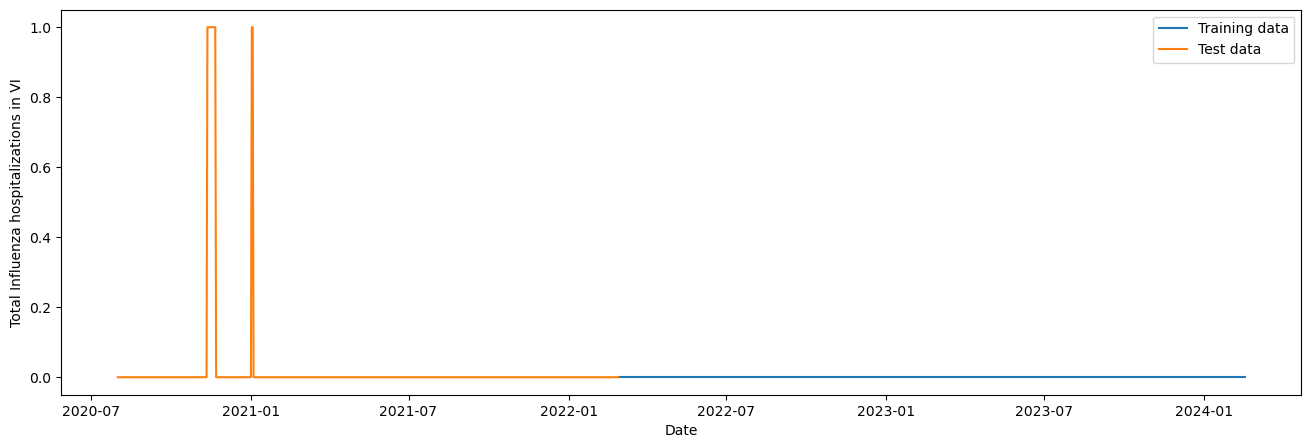

In [430]:

# Plot the data
plt.figure(figsize=(16, 5))
plt.plot(demand_train['y'])
plt.plot(demand_test['y'])
plt.ylabel("Total Influenza hospitalizations in VI")
plt.xlabel("Date")
plt.legend(["Training data", "Test data"])
plt.show()

In [432]:
model_params_fit_not_done = False
if model_params_fit_not_done:
    # CV parameter search
    n_iter = 100
    n_splits = 5
    tscv = TimeSeriesSplit(n_splits=n_splits)
    random_state = 59
    rf_model = RandomForestRegressor(random_state=random_state)
    rf_params = {"max_depth": randint(2, 30), "n_estimators": randint(10, 100)}
    cv_obj = RandomizedSearchCV(
        rf_model,
        param_distributions=rf_params,
        n_iter=n_iter,
        cv=tscv,
        scoring="neg_root_mean_squared_error",
        random_state=random_state,
        verbose=0,
        n_jobs=-1,
    )
    cv_obj.fit(X_train, y_train)
    model = cv_obj.best_estimator_
else:
    # Model: Random Forest previously optimized with a cross-validation
    model = RandomForestRegressor(
        max_depth=10, n_estimators=50, random_state=59
    )

In [434]:
alpha = 0.1
gap = 1
cv_mapiets = BlockBootstrap(
    n_resamplings=10, n_blocks=10, overlapping=False, random_state=59
)
mapie_enbpi = MapieTimeSeriesRegressor(
    model, method="enbpi", cv=cv_mapiets, agg_function="mean", n_jobs=-1
)
mapie_aci = MapieTimeSeriesRegressor(
    model, method="aci", cv=cv_mapiets, agg_function="mean", n_jobs=-1
)

In [452]:
# For EnbPI
   
mapie_enbpi = mapie_enbpi.fit(X_train,y_train)

y_pred_enbpi_npfit, y_pis_enbpi_npfit = mapie_enbpi.predict(
    X_test, alpha=alpha, ensemble=True,optimize_beta=True,
    allow_infinite_bounds=True
)
y_pis_enbpi_npfit = np.clip(y_pis_enbpi_npfit, 0, 2)
coverage_enbpi_npfit = regression_coverage_score(
    y_test, y_pis_enbpi_npfit[:, 0, 0], y_pis_enbpi_npfit[:, 1, 0]
)
width_enbpi_npfit = regression_mean_width_score(
    y_pis_enbpi_npfit[:, 0, 0], y_pis_enbpi_npfit[:, 1, 0]
)
cwc_enbpi_npfit = coverage_width_based(
    y_test, y_pis_enbpi_npfit[:, 0, 0],
    y_pis_enbpi_npfit[:, 1, 0],
    eta=10,
    alpha=0.1
)

    
# For ACI
mapie_aci = mapie_aci.fit(X_train,y_train)

y_pred_aci_npfit = np.zeros(y_pred_enbpi_npfit.shape)
y_pis_aci_npfit = np.zeros(y_pis_enbpi_npfit.shape)
y_pred_aci_npfit[:gap], y_pis_aci_npfit[:gap, :, :] = mapie_aci.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True,optimize_beta=True,
    allow_infinite_bounds=True
)
for step in range(gap, len(X_test), gap):
    mapie_aci.adapt_conformal_inference(
        X_test.iloc[(step - gap):step, :].to_numpy(),
        y_test.iloc[(step - gap):step].to_numpy(),
        gamma=0.05
    )
    (
        y_pred_aci_npfit[step:step + gap],
        y_pis_aci_npfit[step:step + gap, :, :],
    ) = mapie_aci.predict(
        X_test.iloc[step:(step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
        allow_infinite_bounds=True
    )
    y_pis_aci_npfit[step:step + gap, :, :] = np.clip(
        y_pis_aci_npfit[step:step + gap, :, :], 0, 2
    )
    
coverage_aci_npfit = regression_coverage_score(
    y_test, y_pis_aci_npfit[:, 0, 0], y_pis_aci_npfit[:, 1, 0]
)
width_aci_npfit = regression_mean_width_score(
    y_pis_aci_npfit[:, 0, 0], y_pis_aci_npfit[:, 1, 0]
)
cwc_aci_npfit = coverage_width_based(
    y_test,
    y_pis_aci_npfit[:, 0, 0],
    y_pis_aci_npfit[:, 1, 0],
    eta=10,
    alpha=0.1
)

In [454]:

mapie_enbpi = MapieTimeSeriesRegressor(
    model, method="enbpi", cv=cv_mapiets, agg_function="mean", n_jobs=-1
)
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

y_pred_enbpi_pfit = np.zeros(y_pred_enbpi_npfit.shape)
y_pis_enbpi_pfit = np.zeros(y_pis_enbpi_npfit.shape)
y_pred_enbpi_pfit[:gap], y_pis_enbpi_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True,
    allow_infinite_bounds=True
)

for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap):step, :],
        y_test.iloc[(step - gap):step],
    )
    (
        y_pred_enbpi_pfit[step:step + gap],
        y_pis_enbpi_pfit[step:step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step:(step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
        allow_infinite_bounds=True
    )
    y_pis_enbpi_pfit[step:step + gap, :, :] = np.clip(
        y_pis_enbpi_pfit[step:step + gap, :, :], 0, 2
    )
coverage_enbpi_pfit = regression_coverage_score(
    y_test, y_pis_enbpi_pfit[:, 0, 0], y_pis_enbpi_pfit[:, 1, 0]
)
width_enbpi_pfit = regression_mean_width_score(
    y_pis_enbpi_pfit[:, 0, 0], y_pis_enbpi_pfit[:, 1, 0]
)
cwc_enbpi_pfit = coverage_width_based(
    y_test, y_pis_enbpi_pfit[:, 0, 0], y_pis_enbpi_pfit[:, 1, 0],
    eta=10,
    alpha=0.1
)

In [456]:
mapie_aci = MapieTimeSeriesRegressor(
    model, method="aci", cv=cv_mapiets, agg_function="mean", n_jobs=-1
)
mapie_aci = mapie_aci.fit(X_train, y_train)

y_pred_aci_pfit = np.zeros(y_pred_aci_npfit.shape)
y_pis_aci_pfit = np.zeros(y_pis_aci_npfit.shape)
y_pred_aci_pfit[:gap], y_pis_aci_pfit[:gap, :, :] = mapie_aci.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True,
    allow_infinite_bounds=True
)

for step in range(gap, len(X_test), gap):
    mapie_aci.partial_fit(
        X_test.iloc[(step - gap):step, :],
        y_test.iloc[(step - gap):step],
    )
    mapie_aci.adapt_conformal_inference(
        X_test.iloc[(step - gap):step, :].to_numpy(),
        y_test.iloc[(step - gap):step].to_numpy(),
        gamma=0.05
    )
    (
        y_pred_aci_pfit[step:step + gap],
        y_pis_aci_pfit[step:step + gap, :, :],
    ) = mapie_aci.predict(
        X_test.iloc[step:(step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
        allow_infinite_bounds=True
    )
    y_pis_aci_pfit[step:step + gap, :, :] = np.clip(
        y_pis_aci_pfit[step:step + gap, :, :], 0, 2
    )

coverage_aci_pfit = regression_coverage_score(
    y_test, y_pis_aci_pfit[:, 0, 0], y_pis_aci_pfit[:, 1, 0]
)
width_aci_pfit = regression_mean_width_score(
    y_pis_aci_pfit[:, 0, 0], y_pis_aci_pfit[:, 1, 0]
)
cwc_aci_pfit = coverage_width_based(
    y_test, y_pis_aci_pfit[:, 0, 0], y_pis_aci_pfit[:, 1, 0],
    eta=0.01,
    alpha=0.1
)

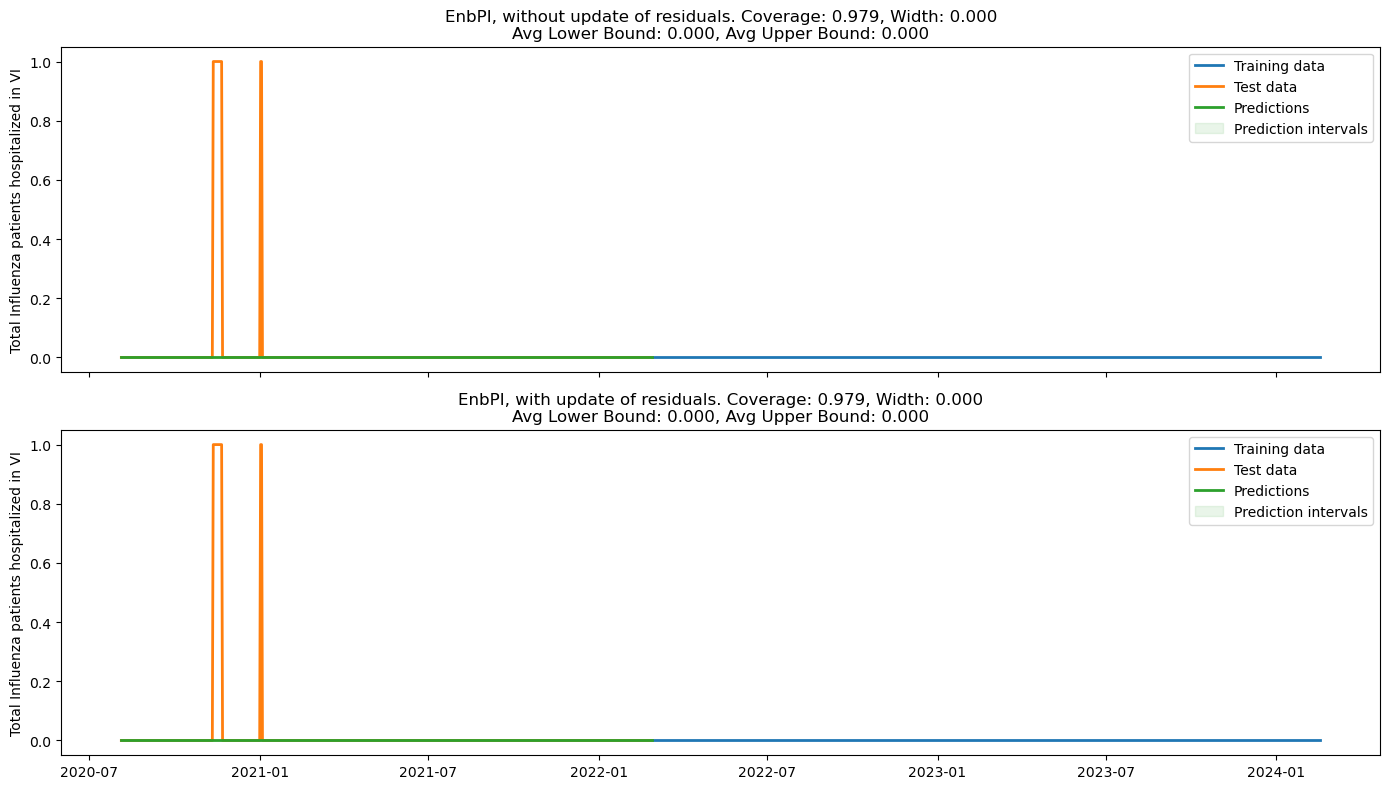

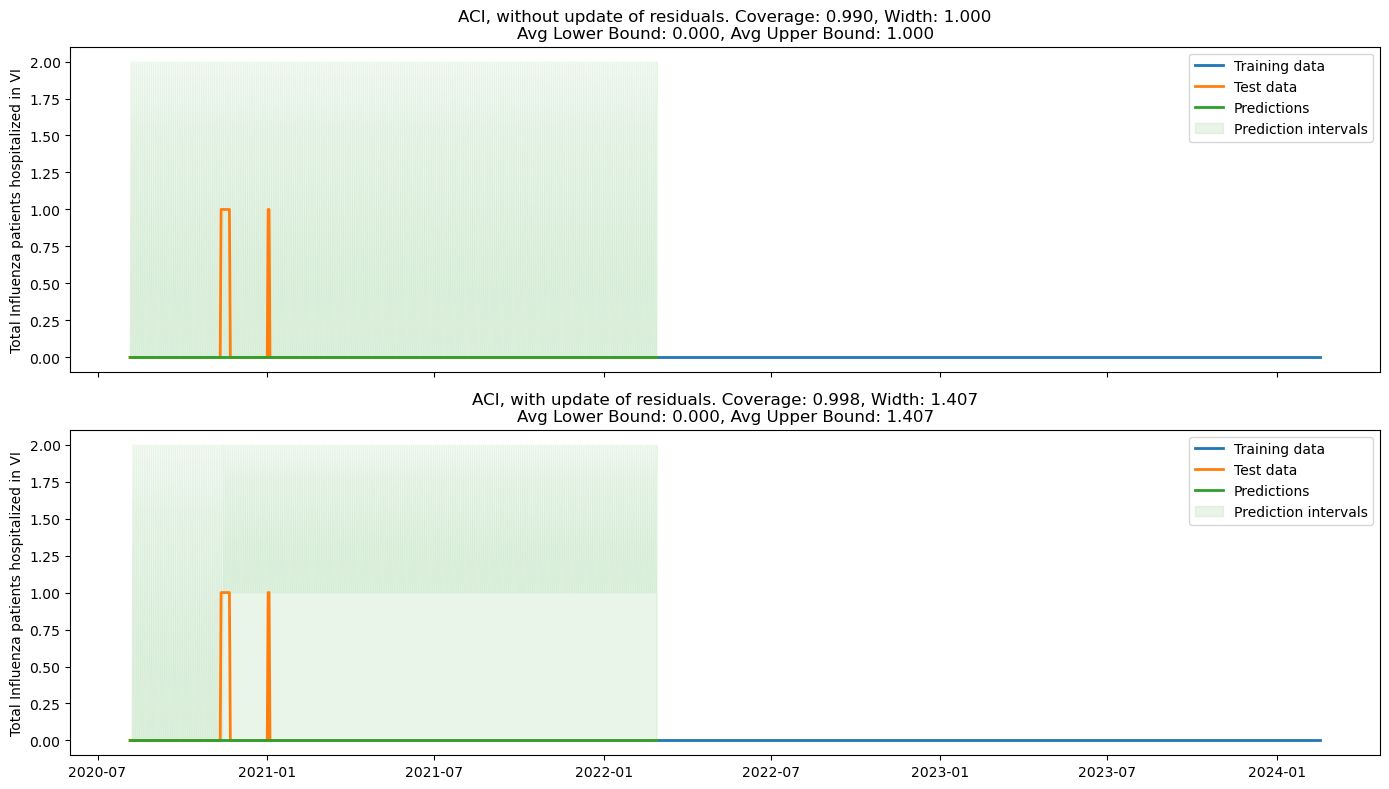

In [458]:
y_enbpi_preds = [y_pred_enbpi_npfit, y_pred_enbpi_pfit]
y_enbpi_pis = [y_pis_enbpi_npfit, y_pis_enbpi_pfit]
coverages_enbpi = [coverage_enbpi_npfit, coverage_enbpi_pfit]
widths_enbpi = [width_enbpi_npfit, width_enbpi_pfit]

y_aci_preds = [y_pred_aci_npfit, y_pred_aci_pfit]
y_aci_pis = [y_pis_aci_npfit, y_pis_aci_pfit]
coverages_aci = [coverage_aci_npfit, coverage_aci_pfit]
widths_aci = [width_aci_npfit, width_aci_pfit]

# Calculate the Average Upper and Lower Bounds for EnbPI
avg_lower_enbpi_npfit = np.mean(y_pis_enbpi_npfit[:, 0, 0])
avg_upper_enbpi_npfit = np.mean(y_pis_enbpi_npfit[:, 1, 0])
avg_lower_enbpi_pfit = np.mean(y_pis_enbpi_pfit[:, 0, 0])
avg_upper_enbpi_pfit = np.mean(y_pis_enbpi_pfit[:, 1, 0])

# Calculate the Average Upper and Lower Bounds for ACI
avg_lower_aci_npfit = np.mean(y_pis_aci_npfit[:, 0, 0])
avg_upper_aci_npfit = np.mean(y_pis_aci_npfit[:, 1, 0])
avg_lower_aci_pfit = np.mean(y_pis_aci_pfit[:, 0, 0])
avg_upper_aci_pfit = np.mean(y_pis_aci_pfit[:, 1, 0])

# Visualization for EnbPI
fig, axs = plt.subplots(
    nrows=2, ncols=1, figsize=(14, 8), sharey="row", sharex="col"
)
for i, (ax, w, avg_lower, avg_upper) in enumerate(
        zip(axs, ["without", "with"], 
            [avg_lower_enbpi_npfit, avg_lower_enbpi_pfit], 
            [avg_upper_enbpi_npfit, avg_upper_enbpi_pfit])):
    ax.set_ylabel("Total Influenza patients hospitalized in VI")
    ax.plot(
        y_train.loc[X_train.index],
        lw=2,
        label="Training data", c="C0"
    )
    ax.plot(y_test, lw=2, label="Test data", c="C1")
    ax.plot(
        y_test.index, y_enbpi_preds[i], lw=2, c="C2", label="Predictions"
    )
    ax.fill_between(
        y_test.index,
        y_enbpi_pis[i][:, 0, 0],
        y_enbpi_pis[i][:, 1, 0],
        color="C2",
        alpha=0.1,
        label="Prediction intervals",
    )
    title = f"EnbPI, {w} update of residuals. "
    title += (f"Coverage: {coverages_enbpi[i]:.3f}, "
              f"Width: {widths_enbpi[i]:.3f}\n"
              f"Avg Lower Bound: {avg_lower:.3f}, "
              f"Avg Upper Bound: {avg_upper:.3f}")
    ax.set_title(title)
    ax.legend()
fig.tight_layout()
plt.show()

# Visualization for ACI
fig, axs = plt.subplots(
    nrows=2, ncols=1, figsize=(14, 8), sharey="row", sharex="col"
)
for i, (ax, w, avg_lower, avg_upper) in enumerate(
        zip(axs, ["without", "with"], 
            [avg_lower_aci_npfit, avg_lower_aci_pfit], 
            [avg_upper_aci_npfit, avg_upper_aci_pfit])):
    ax.set_ylabel("Total Influenza patients hospitalized in VI")
    ax.plot(
        y_train.loc[X_train.index],
        lw=2,
        label="Training data", c="C0"
    )
    ax.plot(y_test, lw=2, label="Test data", c="C1")
    ax.plot(
        y_test.index, y_aci_preds[i], lw=2, c="C2", label="Predictions"
    )
    ax.fill_between(
        y_test.index,
        y_aci_pis[i][:, 0, 0],
        y_aci_pis[i][:, 1, 0],
        color="C2",
        alpha=0.1,
        label="Prediction intervals",
    )
    title = f"ACI, {w} update of residuals. "
    title += (f"Coverage: {coverages_aci[i]:.3f}, "
              f"Width: {widths_aci[i]:.3f}\n"
              f"Avg Lower Bound: {avg_lower:.3f}, "
              f"Avg Upper Bound: {avg_upper:.3f}")
    ax.set_title(title)
    ax.legend()
fig.tight_layout()
plt.show()

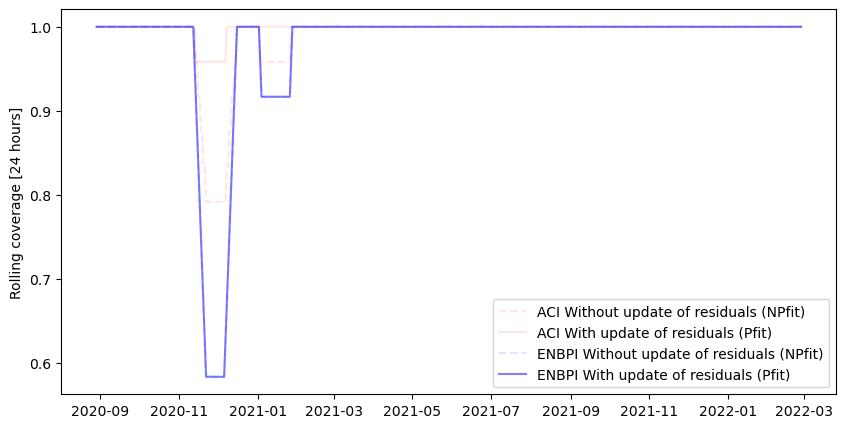

In [460]:
rolling_coverage_aci_pfit, rolling_coverage_aci_npfit = [], []
rolling_coverage_enbpi_pfit, rolling_coverage_enbpi_npfit = [], []

window = 24

for i in range(window, len(y_test), 1):
    rolling_coverage_aci_npfit.append(
        regression_coverage_score(
            y_test[i-window:i], y_pis_aci_npfit[i-window:i, 0, 0],
            y_pis_aci_npfit[i-window:i, 1, 0]
        )
    )
    rolling_coverage_aci_pfit.append(
        regression_coverage_score(
            y_test[i-window:i], y_pis_aci_pfit[i-window:i, 0, 0],
            y_pis_aci_pfit[i-window:i, 1, 0]
        )
    )

    rolling_coverage_enbpi_npfit.append(
        regression_coverage_score(
            y_test[i-window:i], y_pis_enbpi_npfit[i-window:i, 0, 0],
            y_pis_enbpi_npfit[i-window:i, 1, 0]
        )
    )
    rolling_coverage_enbpi_pfit.append(
        regression_coverage_score(
            y_test[i-window:i], y_pis_enbpi_pfit[i-window:i, 0, 0],
            y_pis_enbpi_pfit[i-window:i, 1, 0]
        )
    )

plt.figure(figsize=(10, 5))
plt.ylabel(f"Rolling coverage [{window} hours]")

plt.plot(
    y_test[window:].index,
    rolling_coverage_aci_npfit,
    label="ACI Without update of residuals (NPfit)",
    linestyle='--', color='r', alpha=0.1
)
plt.plot(
    y_test[window:].index,
    rolling_coverage_aci_pfit,
    label="ACI With update of residuals (Pfit)",
    linestyle='-', color='r', alpha=0.1
)

plt.plot(
    y_test[window:].index,
    rolling_coverage_enbpi_npfit,
    label="ENBPI Without update of residuals (NPfit)",
    linestyle='--', color='b', alpha=0.1
)
plt.plot(
    y_test[window:].index,
    rolling_coverage_enbpi_pfit,
    label="ENBPI With update of residuals (Pfit)",
    linestyle='-', color='b', alpha=0.5
)

plt.legend()
plt.show()
